# Into the Wild

The movie Into the Wild illustrates how going out into the unknown can be both thrilling and perilous. This project attempts to address some of the fears people may have when travelling to abroad by providing information about a range of data points, including attitudes to women, violent crime, terorrism, rule of law and corruption. 

## Import libraries

In [1]:
# imports key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Functions

### Process data

#### Get Z-scores

In [2]:
# returns a list of z-scores
def z_score(values):
    mean = np.mean(values)
    std = np.std(values)
    z_scores = []
    for i in range(len(values)):
        z_scores.append( (values[i] - mean) / std )
    return z_scores

# returns a grouped summed dataframe
def grouped_sum(df, group_by='Country Name', value='Value'):
    return df.groupby(group_by).sum(value)

# returns a list of z-score dataframes 
def z_df(dfs):
    z_dfs = []
    for i in range(len(dfs)):
        avg = grouped_sum(eval(dfs[i]))
        avg.Value = z_score(list(avg.Value))
        z_dfs.append(avg)
    return z_dfs

#### Return dataframes

In [3]:
# returns the index of the longest dataframe
def longest_index(df):
    return list(df[max([len(i) for i in enumerate(df)])-1].index)

# returns a list of averages based on a list of dataframes and weights
def WB_gender_data(dfs, weights):
    z_dfs = z_df(dfs)
    longest_df_countries = longest_index(z_dfs)
    avgs = []
    for i in range(len(longest_df_countries)):
        country = longest_df_countries[i]
        values = []
        for i in range(len(dfs)):
            try:
                values.append( z_dfs[i].loc[z_dfs[i].index==country].Value[0] * weights[i] )
            except:
                pass
        avgs.append( np.sum(values) / len(values) )
    avgs_df = pd.DataFrame({'Avg': avgs})
    avgs_df.index = longest_df_countries
        
    return avgs_df

def WB_longform_data(df, reverse=True):
    data = pd.read_csv('C:\\Users\\Jack-\\OneDrive\\Desktop\\Projects\\Into-the-Wild\\Data\\' + df + '.csv')
    data.columns = ['Country', 'C Code', 'Indicator', 'I code'] + list(range(1960, 2023, 1))
    data = data.iloc[4:len(data)].reset_index(drop=True)
    data = data.drop(['C Code', 'Indicator', 'I code'], axis=1)
    cols = ['Country'] + list(range(2010,2023, 1))
    data = data.loc[:,cols]
    avg_df = data.iloc[:,1:].mean(axis=1)
    avg_df.index = data.Country
    not_null = avg_df.isnull().values==False
    final_df = pd.DataFrame({'Avg': avg_df.loc[not_null]})
    final_df.Avg = z_score(final_df.Avg)
    
    if reverse==True:
        final_df.Avg = final_df.Avg*-1
        
    return final_df

### Get barplots

#### Prepare barplot dataframes

In [4]:
# stop user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# gets a list of barplots based on income, regions and best and worst countries
def prep_barplot_dfs(df, countries_only):
    country_names = list(df[~(df.index.isin(demographic)) & ~(df.index.isin(regions))].index.values)
    best_countries_df = df.loc[country_names].sort_values('Avg', ascending=False).iloc[0:10]
    worst_countries_df = df.loc[country_names].sort_values('Avg', ascending=True).iloc[0:10]
    
    if countries_only == False:
        demographic_df = df.filter(items=demographic_viz, axis=0).sort_values('Avg', ascending=False)
        regions_df = df.filter(items=regions_viz, axis=0).sort_values('Avg', ascending=False)
        return [demographic_df, regions_df, best_countries_df, worst_countries_df]
    else:
        return [best_countries_df, worst_countries_df]

#### Define parameters

In [5]:
# creates an exaustive list of those in the country column which aren't countries
demographic = ['High income', 'Upper middle income', 'Lower middle income', 'Low income',
               'Early-demographic dividend', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)',
               'Least developed countries: UN classification', 'Low & middle income', 'Late-demographic dividend', 'OECD members',
               'Other small states', 'Pre-demographic dividend', 'Pacific island small states', 'Post-demographic dividend',
               'Sub-Saharan Africa (excluding high income)', 'Small states']
regions = ['East Asia & Pacific', 'Europe & Central Asia','Latin America & Caribbean', 
           'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa', 
           'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Central Europe and the Baltics',
           'Caribbean small states', 'East Asia & Pacific (excluding high income)', 
           'Europe & Central Asia (excluding high income)', 'Euro area', 'European Union',
           'Latin America & Caribbean (excluding high income)', 'Middle East & North Africa (excluding high income)']

# creates a more selection list of those in the country column which aren't countries we want to visualize
demographic_viz = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
regions_viz = ['East Asia & Pacific', 'Europe & Central Asia','Latin America & Caribbean', 
               'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa']

# creates a list of params for plotting
titles = ['By demography', 'By region', 'Best countries', 'Worst countries']
rotate = [50, 50, 65, 65]
color = ['tab:blue', 'tab:blue', 'tab:green', 'tab:red']

#### Visualizations

In [6]:
# stop future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# gets a series of barplots
def get_barplots(dfs, cols, title, countries_only):
    
    if countries_only == True:
        cols = cols
        rows = int(np.ceil(len(dfs)/cols))
        fig, ax = plt.subplots(rows, cols, figsize=(16,4));
        fig.tight_layout(pad=13.5);
        fig.suptitle(title, y=1.15, fontsize=25);
        for i in range(cols):
            ax[i].bar(dfs[i].index, dfs[i].Avg, color=color[i+2]);
            ax[i].set_title(titles[i+2], fontsize=18);
            ax[i].set_xticklabels(dfs[i].index, rotation=rotate[i+2]);
            ax[i].set_ylabel('Score');
    else:
        cols = cols
        rows = int(np.ceil(len(dfs)/cols))
        fig, ax = plt.subplots(rows, cols, figsize=(16,12));
        fig.tight_layout(pad=13.5);
        fig.suptitle(title, y=0.925, fontsize=25);
        for i in range(rows):
            for j in range(cols):
                num = (i*rows)+j
                ax[i, j].bar(dfs[num].index, dfs[num].Avg, color=color[num]);
                ax[i, j].set_title(titles[num], fontsize=18);
                ax[i, j].set_xticklabels(dfs[num].index, rotation=rotate[num]);
                ax[i, j].set_ylabel('Score');

# gets barplot dfs and then visualizes the data
def barplot_summary(df, cols=2, title='', countries_only=False):
    dfs = prep_barplot_dfs(df, countries_only)
    return get_barplots(dfs, cols=cols, title=title, countries_only=countries_only)

## Attitudes to women

### Get metric

In [7]:
# imports gender data
sexual_violence_12_m = pd.read_csv("C:\\Users\\Jack-\\OneDrive\\Desktop\\Projects\\Into-the-Wild\\Data\\last_12_months_sexual_violence.csv")
partner_violence_prop = pd.read_csv("C:\\Users\\Jack-\\OneDrive\\Desktop\\Projects\\Into-the-Wild\\Data\\proportion_intimate_partner_violence.csv")

# creates an averages dataframe
dfs = ['sexual_violence_12_m', 'partner_violence_prop']
weights = [1.25, 0.75]

# creates the dataframe
gender_df = WB_gender_data(dfs, weights)

# reverses the scores so that better countries have higher values
gender_df.Avg = gender_df.Avg*-1

### Plot results

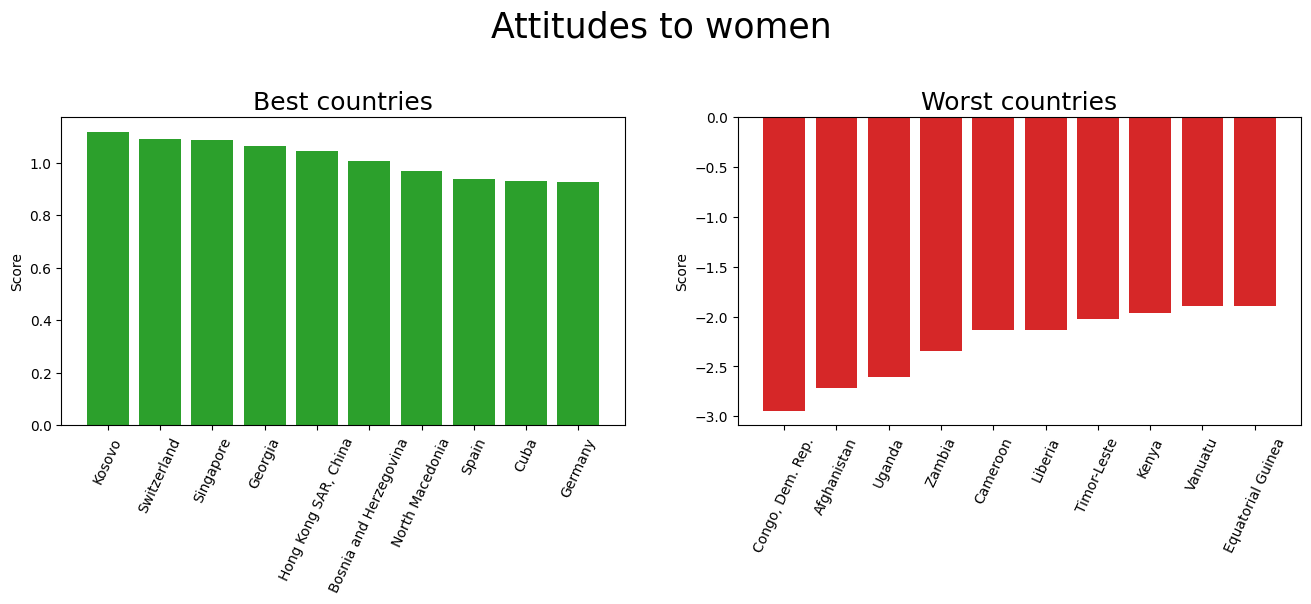

In [8]:
barplot_summary(gender_df, title='Attitudes to women', countries_only=True)

## Violent crime

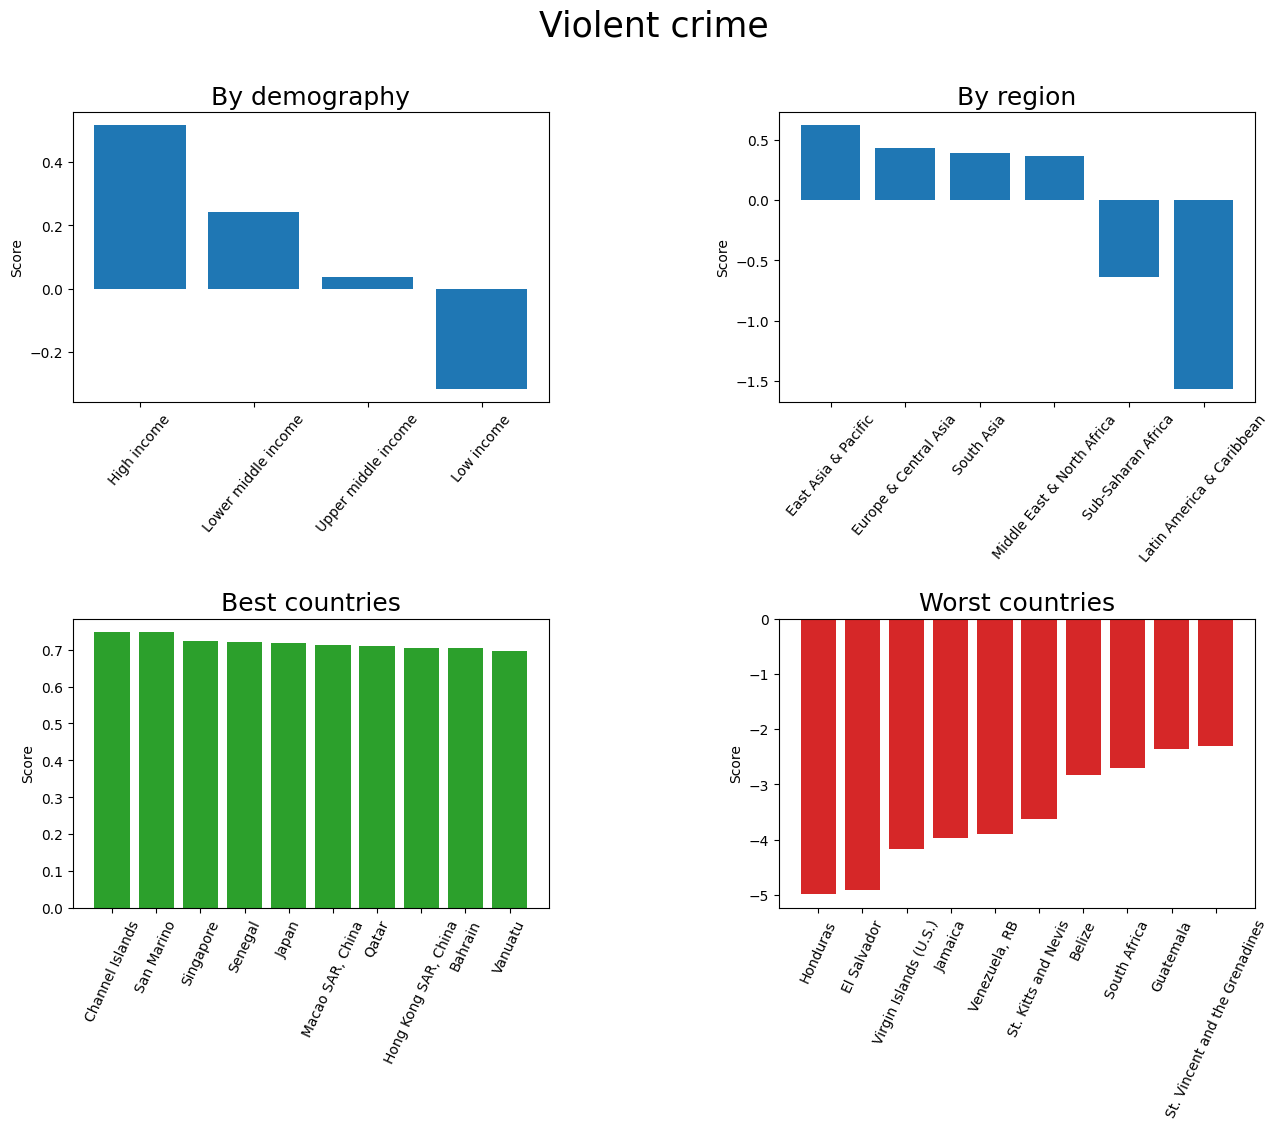

In [9]:
intentional_homicides_df = WB_longform_data('intentional_homicides')
barplot_summary(intentional_homicides_df, title='Violent crime')

## Terrorism

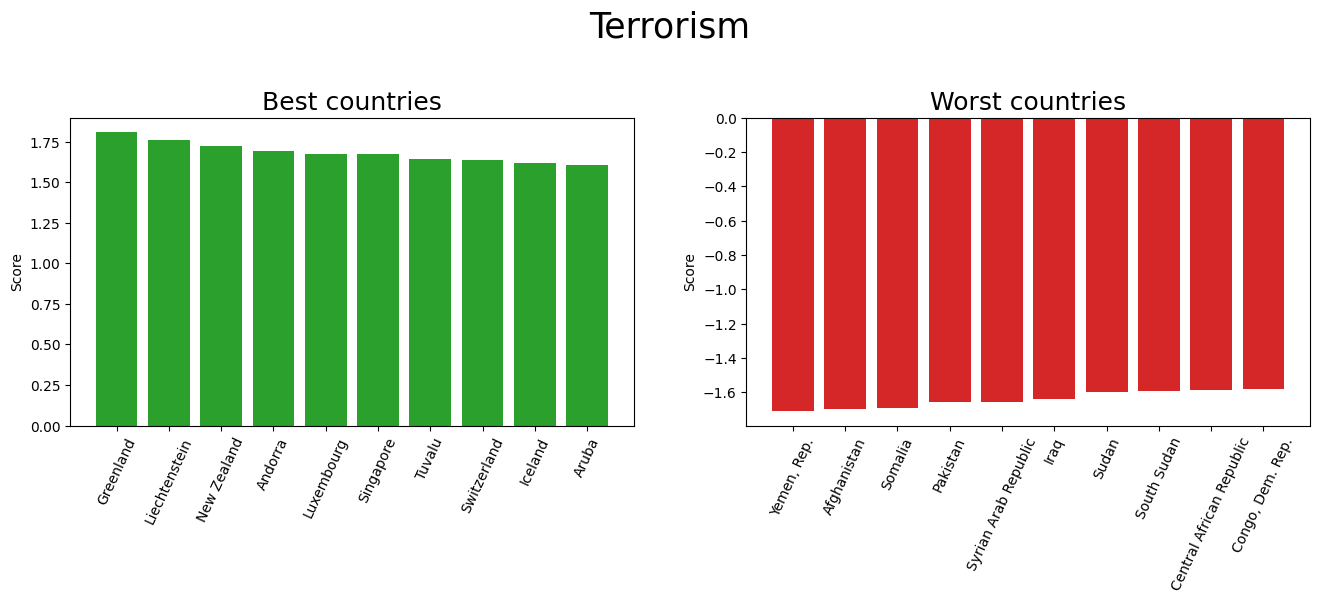

In [10]:
terrorism_df = WB_longform_data('political_stability', reverse=False)
barplot_summary(terrorism_df, title='Terrorism', countries_only=True)

## Rule of law

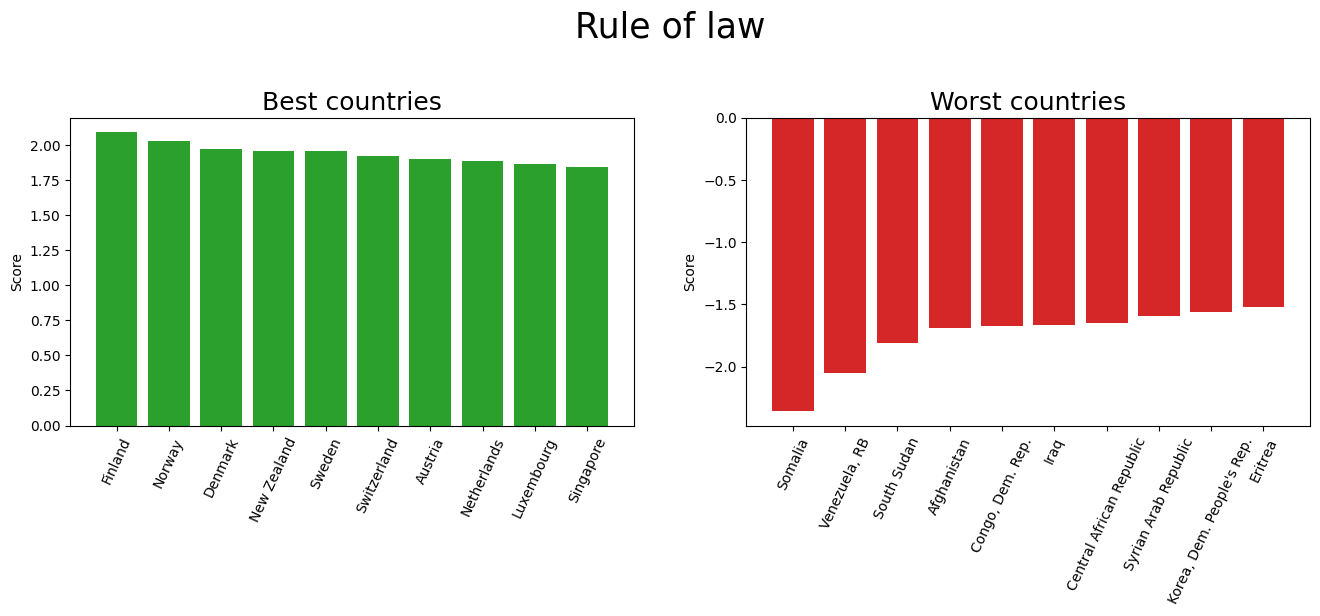

In [11]:
rule_of_law_df = WB_longform_data('rule_of_law', reverse=False)
barplot_summary(rule_of_law_df, title='Rule of law', countries_only=True)

## Control of corruption

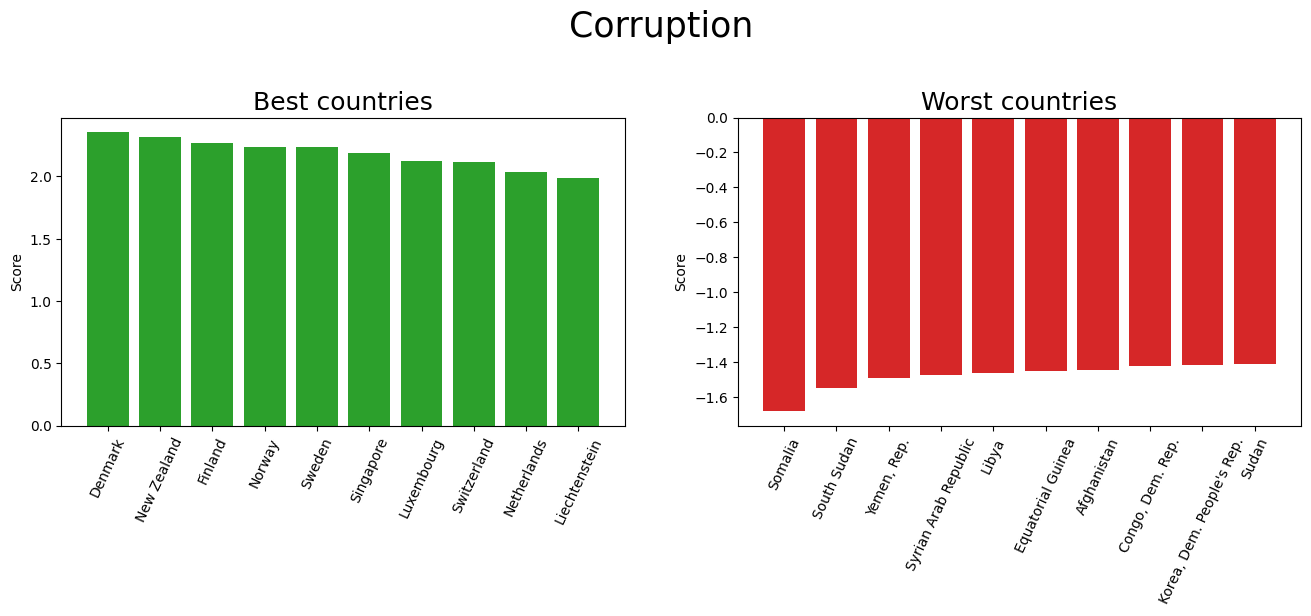

In [12]:
corruption_df = WB_longform_data('control_of_corruption', reverse=False)
barplot_summary(corruption_df, title='Corruption', countries_only=True)